<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1##
(Meershchaert) An automobile manufacturer makes a profit of ``$``1500 on the sale of a certain model. It is estimated that for every  ``$``100 of rebate, sales increase by 15\%. <br>
    (a) What amount of rebate will maximize profit?

In [0]:
## Helper functions for solving single variable optmization problems####
fprime = function (f,a,h=0.0001){(f(a+h)-f(a-h))/(2*h)}
bisection = function(f,a,b,tol=0.0001){
  if (f(a)*f(b) > 0){
    return ("Boundary Conditions Not Met")
  }
  else{
    middle = a
    while (abs(f(middle))>tol){
      middle = (a+b)/2
      if (f(middle)*f(a)>0) (a = middle)
      else (b = middle)
      x=middle
      y=f(middle)
      ## if you want to "see" what happens at every step, take off the # of the next line ##
      #cat(sprintf("x-Val: %.4f ; f(x-val): %.4f\n",x,y))
    }
    return (middle)
  }
}

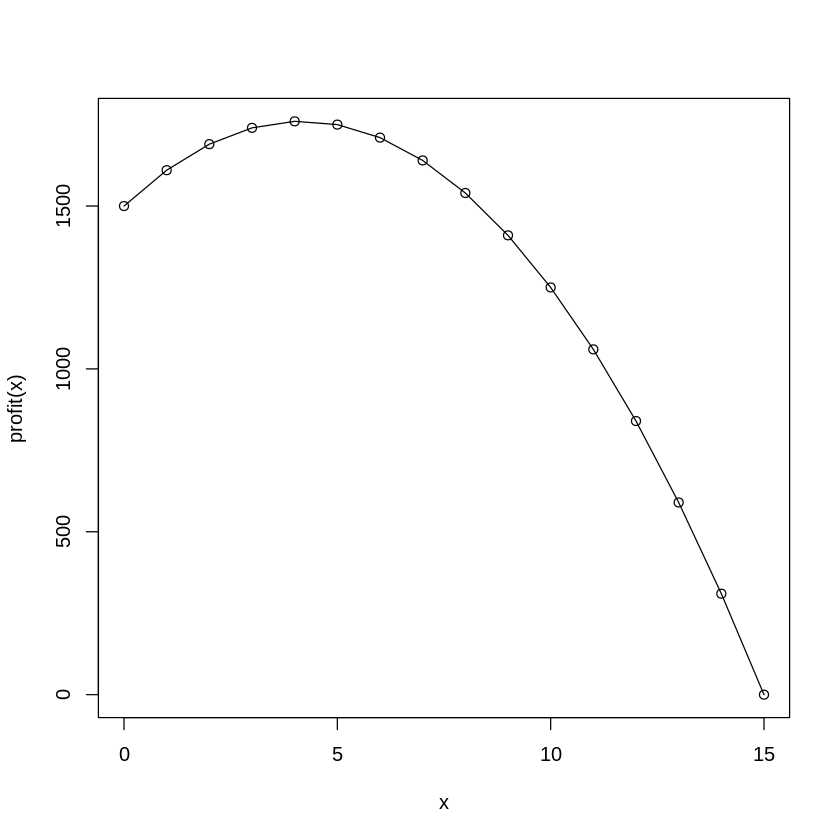

In [0]:
profit = function (x){
  return((1500-100*x)*(1+.15*x))
}
x = seq(0,15,1)
plot(x,profit(x),type="o")

In [0]:
dProfit = function(x){fprime(profit,x)}
bisection(dProfit,0,20)

[1] 4.16667

   salesIncrease optimalRebate   profit
1           0.05    -2.5000000 1531.250
2           0.06    -0.8333397 1504.167
3           0.07     0.3571463 1500.893
4           0.08     1.2500000 1512.500
5           0.09     1.9444418 1534.028
6           0.10     2.4999952 1562.500
7           0.11     2.9545474 1596.023
8           0.12     3.3333325 1633.333
9           0.13     3.6538458 1673.558
10          0.14     3.9285684 1716.071
11          0.15     4.1666698 1760.417
12          0.16     4.3750024 1806.250
13          0.17     4.5588231 1853.309
14          0.18     4.7222233 1901.389
15          0.19     4.8684216 1950.329
16          0.20     5.0000000 2000.000
17          0.21     5.1190472 2050.298
18          0.22     5.2272725 2101.136
19          0.23     5.3260851 2152.446
20          0.24     5.4166651 2204.167
21          0.25     5.4999995 2256.250
22          0.26     5.5769217 2308.654
23          0.27     5.6481469 2361.343
24          0.28     5.7142866 2414.286


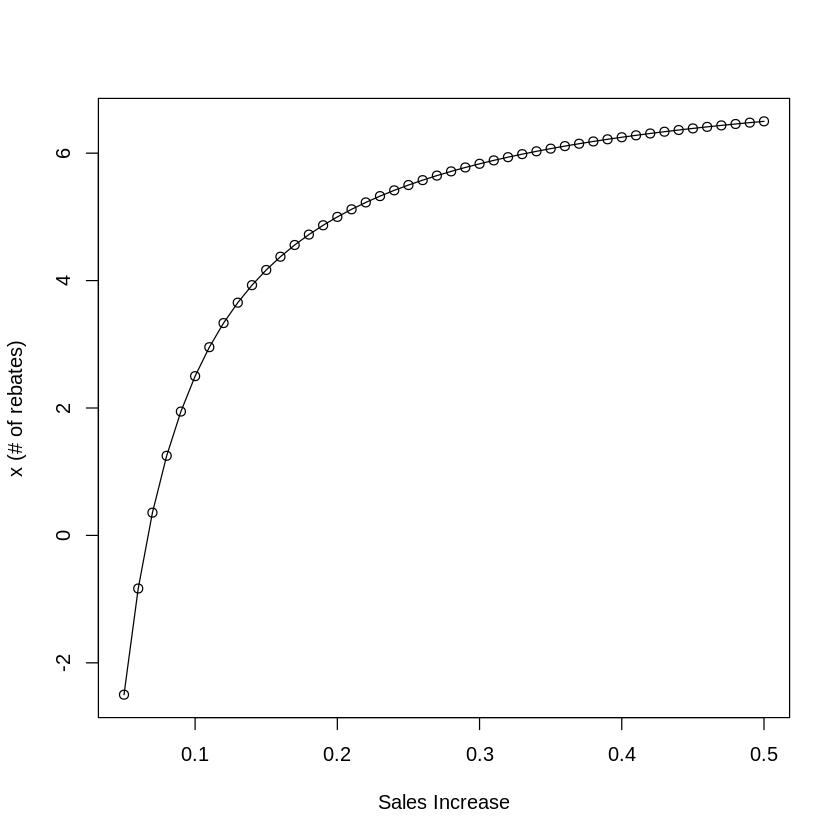

In [0]:
sales = seq(0.05,0.5,0.01)
ans = 0
ans.profit=0
for (i in 1:length(sales)){
    profit = function (x){
      return((1500-100*x)*(1+sales[i]*x))
    }
    dProfit = function(x){fprime(profit,x)}
    ans[i] = bisection(dProfit,-10,20)    
    ans.profit[i]=profit(ans[i])
}
result = data.frame(salesIncrease=sales,optimalRebate=ans,profit=ans.profit)
print(result)
plot(sales,ans,"o",xlab="Sales Increase",ylab="x (# of rebates)")

   rebateSize optimalNumber   profit
1          50    11.6666698 2520.833
2          60     9.1666651 2256.250
3          70     7.3809505 2072.024
4          80     6.0416698 1938.021
5          90     5.0000000 1837.500
6         100     4.1666698 1760.417
7         110     3.4848487 1700.379
8         120     2.9166675 1653.125
9         130     2.4358976 1615.705
10        140     2.0238101 1586.012
11        150     1.6666651 1562.500
12        160     1.3541663 1544.010
13        170     1.0784316 1529.657
14        180     0.8333349 1518.750
15        190     0.6140339 1510.746
16        200     0.4166663 1505.208


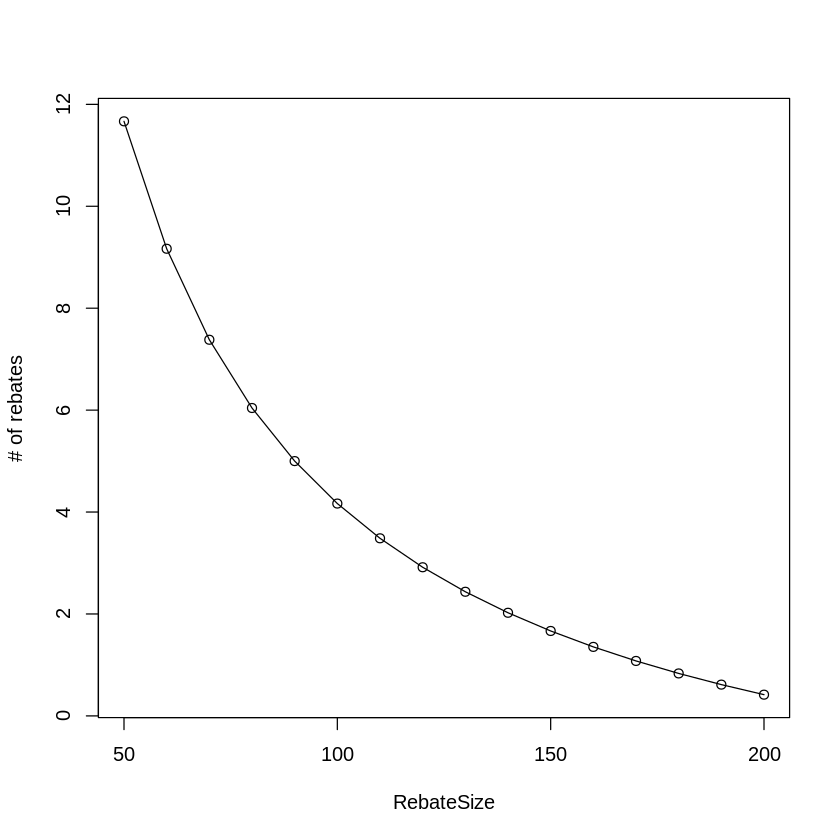

In [0]:
rebateSize = seq(50,200,10)
ans = 0
ans.profit=0
for (i in 1:length(rebateSize)){
    profit = function (x){
      return((1500-rebateSize[i]*x)*(1+0.15*x))
    }
    dProfit = function(x){fprime(profit,x)}
    ans[i] = bisection(dProfit,-10,20)    
    ans.profit[i]=profit(ans[i])
}
result=data.frame(rebateSize=rebateSize,optimalNumber=ans,profit=ans.profit)
print(result)
plot(rebateSize,ans,"o",xlab="RebateSize",ylab="# of rebates")

A reduction in profit would result when the sales increase is small and rebate size is large. For example, a ``$200`` rebate results in a 5\% increase in sales. This would cause the profit function to be:<br>
$$ \text{profit}(x)=(1500-200x)(1+.05x)$$ <br>
Providing one rebate would cause the profits to fall as shown in the following chart.

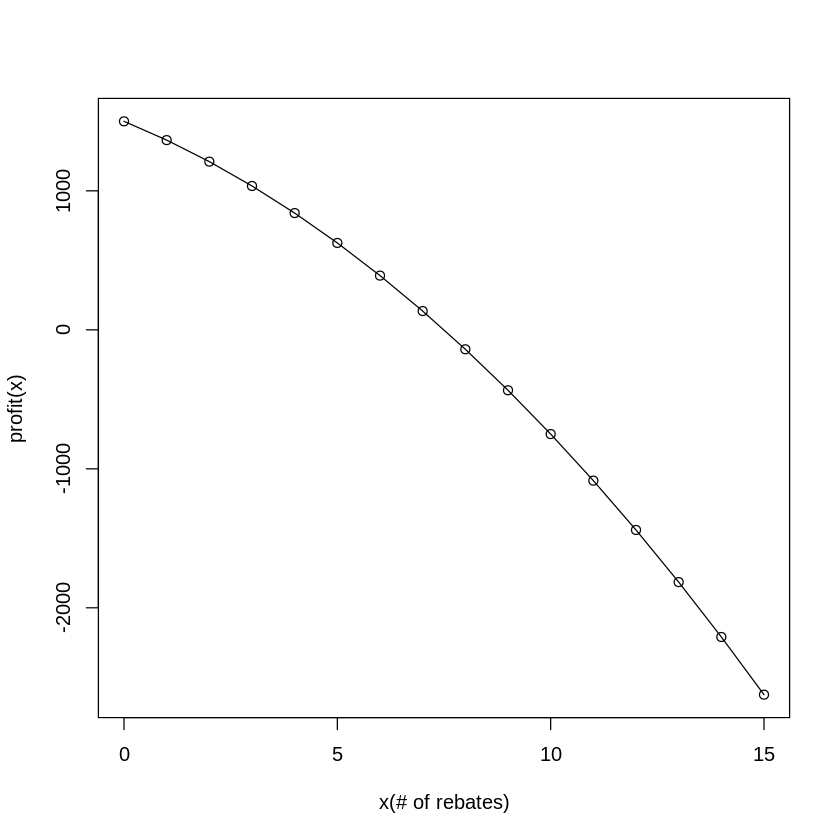

In [0]:
profit = function (x){
  return((1500-200*x)*(1+.05*x))
}
x = seq(0,15,1)
plot(x,profit(x),type="o",xlab="x(# of rebates)")

## Homework 2
(Meershaert) Use the pig problem and conduct a sensitivity analysis on the cost of keeping the pig per day. If a different feed that cost 60 cent per day but allowed the pig to grow 7lbs per day, would it be worth swithing? What is the minimum growth rate that would make this new feed worthwhile?

[1] 9.499359 9.000397 8.499146 8.000183 7.500076 6.999969 6.499863
[1] 134.50 134.05 133.60 133.20 132.80 132.45 132.10


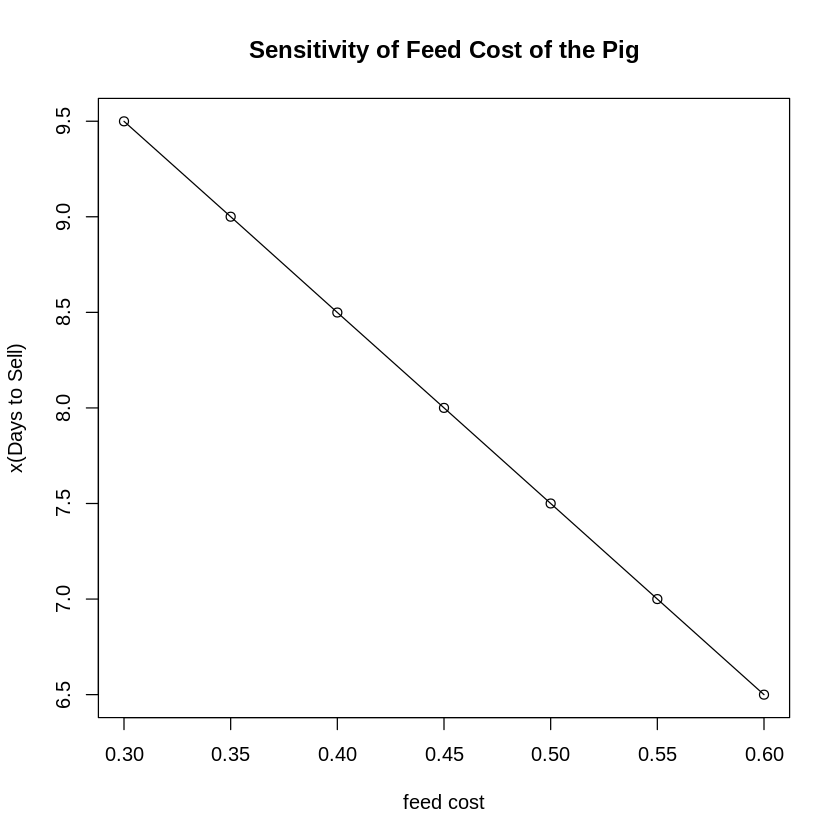

In [0]:
#Sensitivity of Feed Cost of Pig
feed = seq(0.3,0.6,0.05)
pr = array(0,length(feed))
ans = array(0,length(feed))
for (i in 1:length(feed)){
    profit = function (x){
      return((0.65-0.01*x)*(200+5*x)-feed[i]*x)
    }
    dProfit = function(x){fprime(profit,x,)}
    ans[i] = bisection(dProfit,-100,50,0.0001)
    pr[i] = profit(round(ans[i]))
}
print(ans)
print(pr)
plot(feed,ans,"o",xlab="feed cost",ylab="x(Days to Sell)")
title("Sensitivity of Feed Cost of the Pig")

[1] 13.92822


[1] 143.58

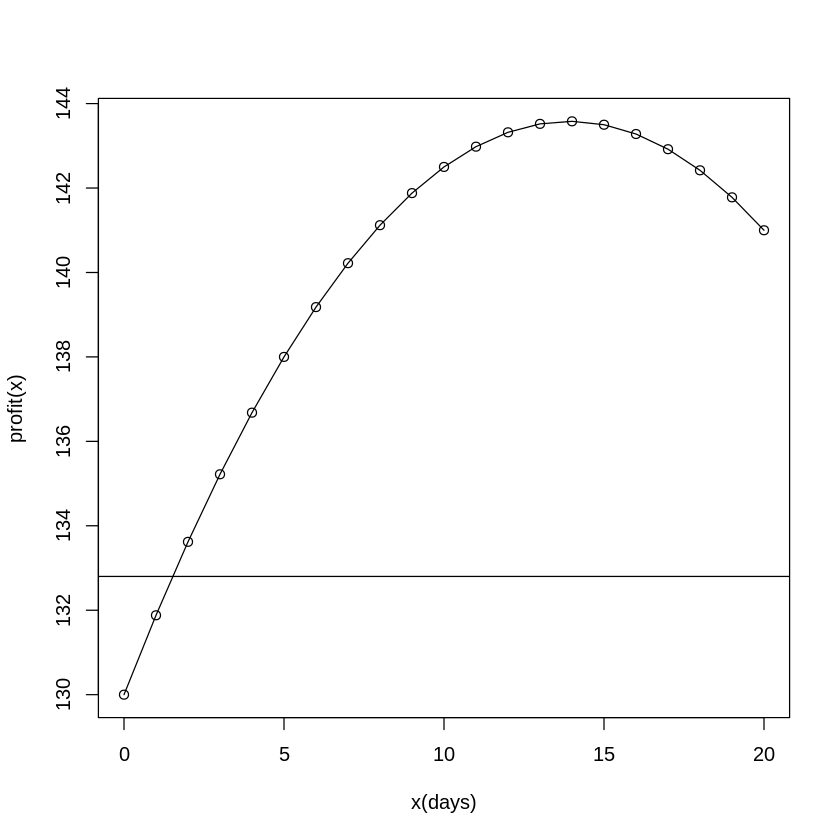

In [0]:
# .60 per day feeding / growth rate increase of 7 lbs per day / assume 132.8 was previous profit
profit = function (x){
  return((0.65-0.01*x)*(200+7*x)-0.6*x)
}
x = seq(0,20,1)
plot(x,profit(x),type="o",xlab="x(days)")
abline(h=132.8) #represents the max profits for previous feed
dProfit = function(x){fprime(profit,x)}
ans=bisection(dProfit,0,20)
print(ans)
profit(round(ans))

The answer to the question of whether to change feeds based on the model/assumptions used is YES - change and wait longer before selling (14 days) to increase profits to ``$143.58``.

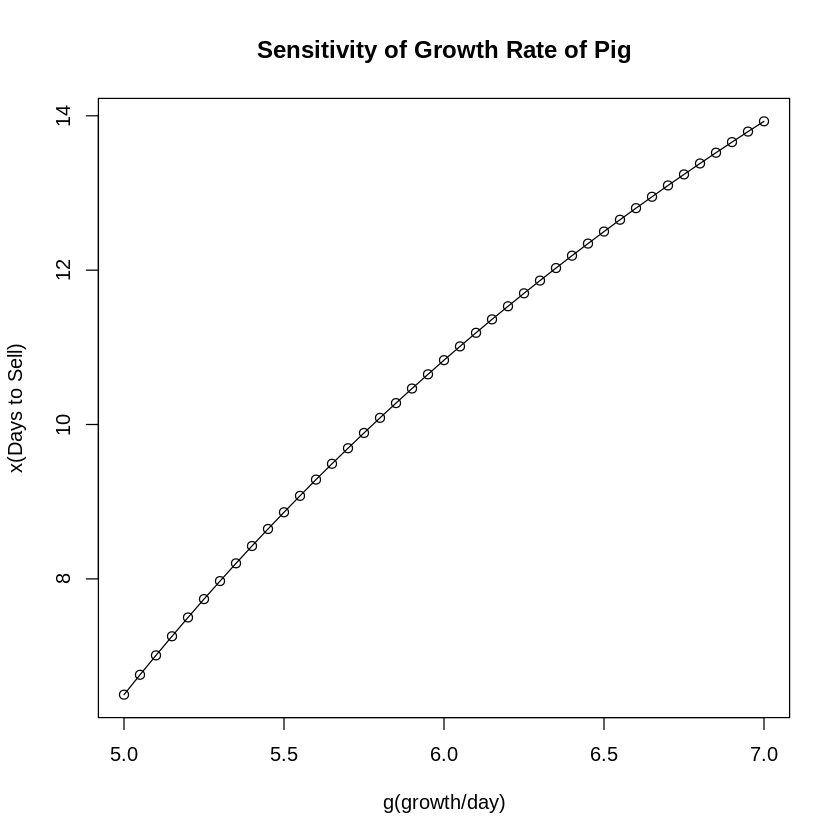

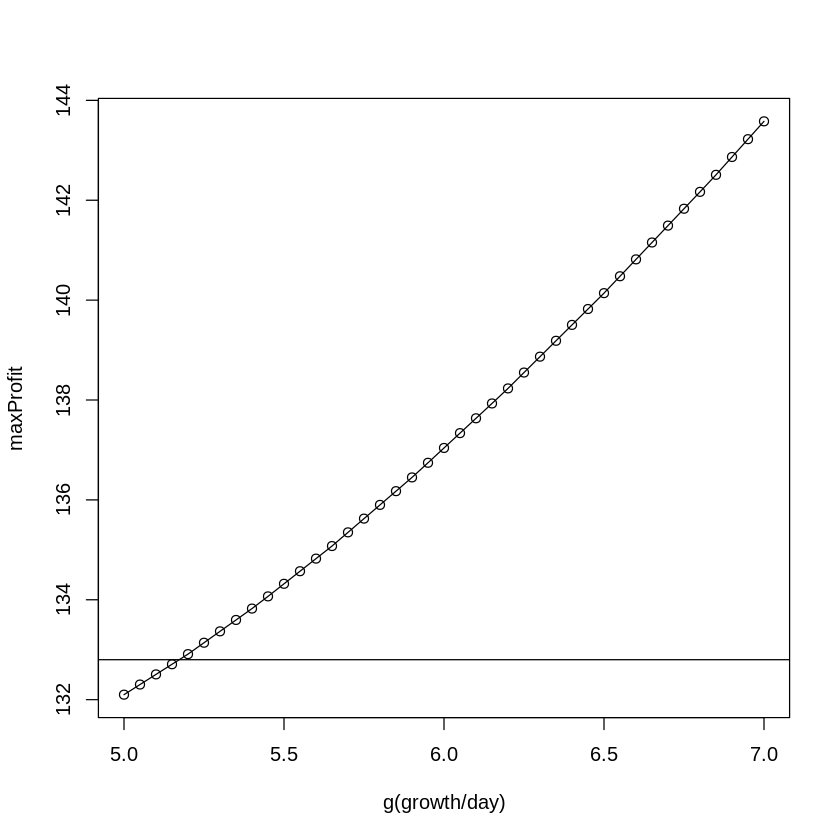

In [0]:
#Growth rate of the pig = g
g = seq(5,7,0.05)
pr = array(0,length(g))
ans = array(0,length(g))
for (i in 1:length(g)){
    profit = function (x){
      return((0.65-0.01*x)*(200+g[i]*x)-.6*x)
    }
    dProfit = function(x){fprime(profit,x,)}
    ans[i] = bisection(dProfit,-100,50,0.0001)
    pr[i] = profit(round(ans[i]))
}
plot(g,ans,"o",xlab="g(growth/day)",ylab="x(Days to Sell)") #Does not answer the question anymore
title("Sensitivity of Growth Rate of Pig")
plot(g,pr,"o",xlab="g(growth/day)",ylab="maxProfit") #This is what we need to look at now
abline(h=132.8)


In [0]:
## Review the results of the optimizations ##
result = data.frame(growthRate = g,daysToSell=ans,profit=pr,better=pr>133.2)
print(result)

   growthRate daysToSell  profit better
1        5.00   6.499863 132.100  FALSE
2        5.05   6.757355 132.303  FALSE
3        5.10   7.009125 132.506  FALSE
4        5.15   7.256317 132.709  FALSE
5        5.20   7.500076 132.912  FALSE
6        5.25   7.738113 133.140  FALSE
7        5.30   7.971573 133.368   TRUE
8        5.35   8.201599 133.596   TRUE
9        5.40   8.425903 133.824   TRUE
10       5.45   8.646774 134.068   TRUE
11       5.50   8.863068 134.320   TRUE
12       5.55   9.075928 134.572   TRUE
13       5.60   9.286499 134.824   TRUE
14       5.65   9.491348 135.076   TRUE
15       5.70   9.692764 135.350   TRUE
16       5.75   9.890747 135.625   TRUE
17       5.80  10.086441 135.900   TRUE
18       5.85  10.277557 136.175   TRUE
19       5.90  10.466385 136.450   TRUE
20       5.95  10.650635 136.743   TRUE
21       6.00  10.833740 137.040   TRUE
22       6.05  11.012268 137.337   TRUE
23       6.10  11.188507 137.634   TRUE
24       6.15  11.362457 137.931   TRUE


In [0]:
## Take a closer look at the growth rate and profit to find when the new feed is no longer better
g = seq(5,5.5,0.01)
pr = array(0,length(g))
ans = array(0,length(g))
for (i in 1:length(g)){
    profit = function (x){
      return((0.65-0.01*x)*(200+g[i]*x)-.6*x)
    }
    dProfit = function(x){fprime(profit,x,)}
    ans[i] = bisection(dProfit,-100,50,0.0001)
    pr[i] = profit(round(ans[i]))
}
result = data.frame(growthRate = g,daysToSell=ans,profit=pr,better=pr>133.2)
print(result)

   growthRate daysToSell   profit better
1        5.00   6.499863 132.1000  FALSE
2        5.01   6.551361 132.1406  FALSE
3        5.02   6.604004 132.1812  FALSE
4        5.03   6.654358 132.2218  FALSE
5        5.04   6.707001 132.2624  FALSE
6        5.05   6.757355 132.3030  FALSE
7        5.06   6.807709 132.3436  FALSE
8        5.07   6.858063 132.3842  FALSE
9        5.08   6.909561 132.4248  FALSE
10       5.09   6.958771 132.4654  FALSE
11       5.10   7.009125 132.5060  FALSE
12       5.11   7.059479 132.5466  FALSE
13       5.12   7.109833 132.5872  FALSE
14       5.13   7.157898 132.6278  FALSE
15       5.14   7.208252 132.6684  FALSE
16       5.15   7.256317 132.7090  FALSE
17       5.16   7.306671 132.7496  FALSE
18       5.17   7.354736 132.7902  FALSE
19       5.18   7.402802 132.8308  FALSE
20       5.19   7.452011 132.8714  FALSE
21       5.20   7.500076 132.9120  FALSE
22       5.21   7.548141 132.9576  FALSE
23       5.22   7.595062 133.0032  FALSE
24       5.23   

## Homework 3
(Meer) Reconsider the pig problem of Ex1.1, but now assume the price of the pig is starting to level off. Let 
$$ p(t) = 0.65-0.01t+0.00004t^2$$
represent the price for pigs (cents/lb) after $t$ days.<br>
(a) Graph along with our original price equation. <br>
(b) Find the best time to sell the pig. Model as a one-variable optimization.<br>
(c) Conduct a sensitivity analysis on the coefficient 0.00004 considering both the optimal time to sell and profit.<br>
(d) Compare the results of part (b) to the text solution. Comment on the robustness of our assumptions about the price.

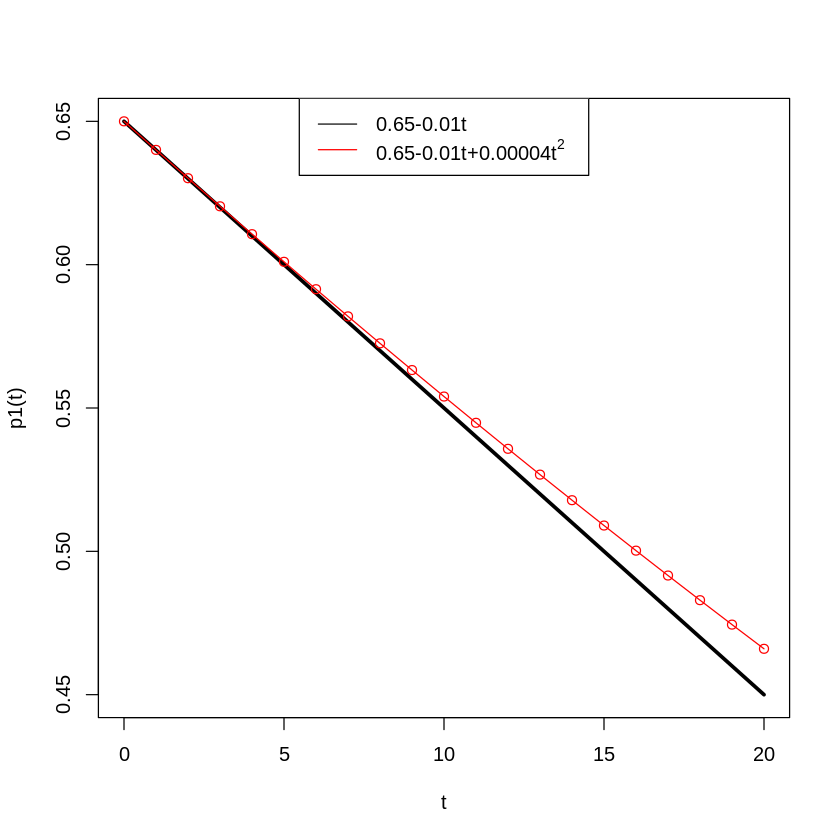

In [0]:
p1 = function(x)0.65-0.01*x
p2 = function(x)0.65-0.01*x+0.00004*x^2
t = seq(0,20)

plot(t,p1(t),"l",lwd=3)
points(t,p2(t),"o",col="red")
legend("top", c("0.65-0.01t", expression(paste("0.65-0.01",t,"+0.00004",t^2))),col=c("black","red"),lty=1)
## Linear Approximation to quadratic function over [0,20] does not change by much, for values near 0 they are very close

[1] 10.27832

   days   profit
1     0 130.0000
2     1 130.7582
3     2 131.4336
4     3 132.0274
5     4 132.5408
6     5 132.9750
7     6 133.3312
8     7 133.6106
9     8 133.8144
10    9 133.9438
11   10 134.0000
12   11 133.9842
13   12 133.8976
14   13 133.7414
15   14 133.5168
16   15 133.2250
17   16 132.8672
18   17 132.4446
19   18 131.9584
20   19 131.4098
21   20 130.8000


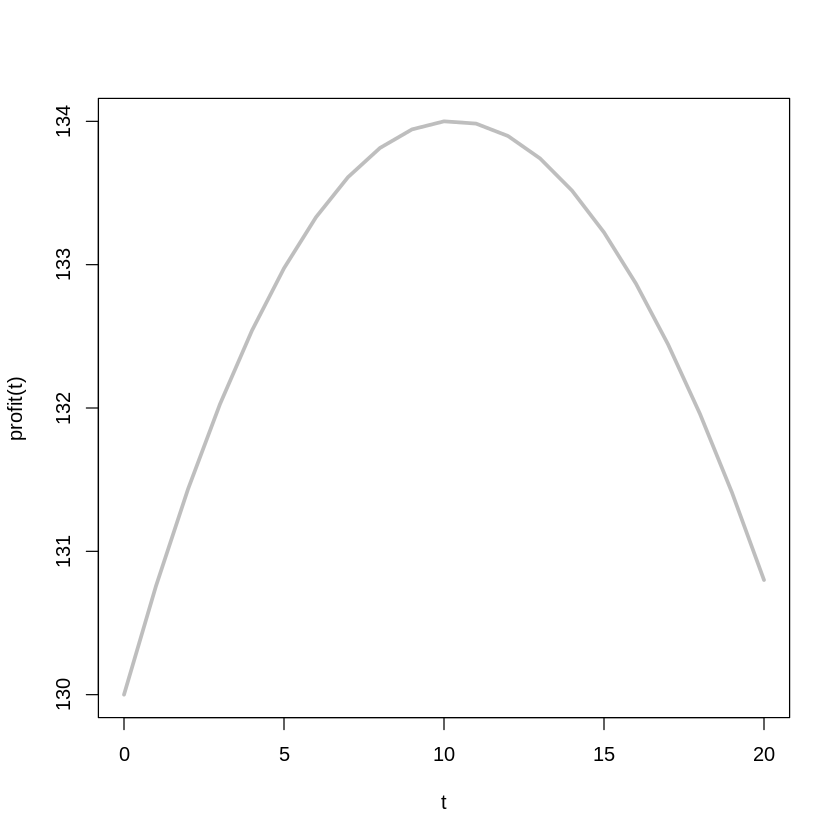

In [0]:
# note the library package only includes fprime and bisection at this time #
c=0.00004
profit = function (x){((0.65-0.01*x+c*x^2)*(200+5*x)-0.45*x)}
dProfit = function(x){fprime(profit,x)}
t = seq(0,20)
plot(t,profit(t),type="l",col="gray",lwd=3)
bisection(dProfit,0,20)
tab = data.frame(days=t,profit=profit(t))
print(tab)
## 5 Step Method should be very similar to previous except the price should be different.

  levelOff optimalDays   profit
1    1e-05    8.444824 133.3628
2    2e-05    8.957520 133.5470
3    3e-05    9.558105 133.7577
4    4e-05   10.278320 134.0028
5    5e-05   11.169434 134.2937
6    6e-05   12.324219 134.6493
7    7e-05   13.950195 135.1045
8    8e-05   16.669922 135.7407


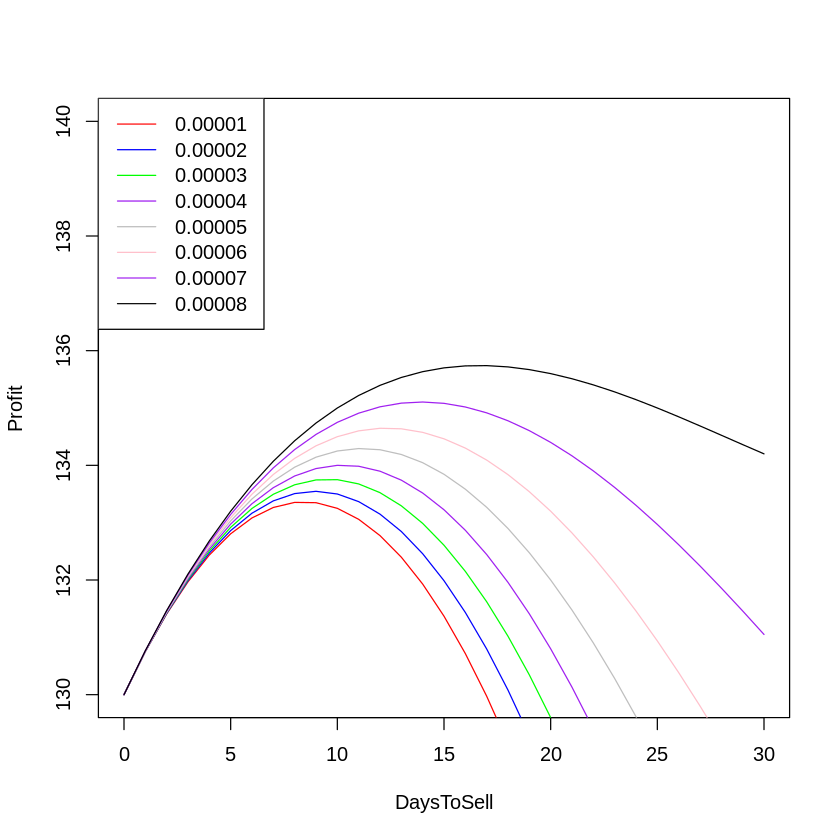

In [0]:
## Sensitivity Analysis of leveling off parameter
lo = seq(0.00001,0.00008,0.00001)
label=0
ans.days = 0
ans.profit=0
t = 0:30
colors = c("red","blue","green","purple","gray","pink","purple","black")
plot(t,col="white",xlab="DaysToSell",ylab="Profit",xlim=c(0,30),ylim=c(130,140)) #set up the plot for the loop
for (i in 1:length(lo)){
    c = lo[i]
    label[i]=sprintf("%.5f",c) #produce string from numbers
    profit = function (x){((0.65-0.01*x+c*x^2)*(200+5*x)-0.45*x)}
    dProfit = function(x){fprime(profit,x)}
    ans.days[i] = bisection(dProfit,0,20)
    ans.profit[i]=profit(ans.days[i])
    points(t,profit(t),col=colors[i],type="l") #individual plots
}
legend("topleft",label,col=colors,lty=1) #legend using the labels created and colors
result = data.frame(levelOff=lo,optimalDays = ans.days,profit=ans.profit)
print(result)

#### Robustness
Given the book answer of 11 days and this answer which is 10 days and not that much different than 11 as far as maximizing profits, we would say that there is not much difference between these two and the original model appears to be robust. Therefore, we are not justified by adding the additional computational effort of a quadratic price decrease (if we were computing the derivatives and solutions by hand). 

On the other hand, the additional complexity does not affect the time needed to solve these problems in any way so use the model that is the most realistic.

## Class Work - Lesson 2
Feel free to paste the code into a cell below or RStudio to see what it does.
```R
## Solve this problem ##
x = seq(0,20)
profit = function(t){(0.65-0.01*t)*(200+5*t)-0.45*t}
plot(x,profit(x),"l")
dProfit = function(t){fprime(profit,t)}
ans = bisection(dProfit,0,20)
```
Note indexing in a for loop.
```R
## Show how to do a for loop ##
for (r in seq(.008,.012,.001)){print(r)}
```
This code solves all of the optimization problems for the price falling between 0.008 through 0.012 and reproduces the chart in the book.
```R
ans.time = 0
ans.prof=0
r = seq(.008,.012,.001)
for (i in 1:length(r)){
  profit = function(t){(0.65-r[i]*t)*(200+5*t)-0.45*t}
  dProfit = function(t){fprime(profit,t)}
  ans.time[i] = bisection(dProfit,0,20)
  ans.prof[i] = profit(ans.time[i])
}

print(ans.time) ## See book##
print(ans.prof)
result = data.frame(price=r,time=ans.time,profit=ans.prof)
print(result) ## Table 1.1 in book
```
Here, we investigate times that are not in the book that could be interesting.
```R
ans.time = 0
ans.prof=0
r = seq(.004,.02,.001)

for (i in 1:length(r)){
  profit = function(t){(0.65-r[i]*t)*(200+5*t)-0.45*t}
  dProfit = function(t){fprime(profit,t)}
  ans.time[i] = bisection(dProfit,-100,200)
  ans.prof[i] = profit(ans.time[i])
}

print(ans.time) ## See book##
print(ans.prof)
result = data.frame(price=r,time=ans.time,profit=ans.prof)
print(result)
```
To figure out the sensitivity of the time to sell with respect to the rate that the pig falls, we use 1 through 10 \% increase in $r$ (the falling price of the pig) and produce a table.
```R
## Sensitivity rates S(x,r) - from book ##
r=0
curr = 8 #days
ans.time=0
ans.prof=0
percentIncrease = seq(0,10)/100
for (i in 1:length(percentIncrease)){
  r[i] = 0.01+(percentIncrease[i]*0.01)
  profit = function(t){(0.65-r[i]*t)*(200+5*t)-0.45*t}
  dProfit = function(t){fprime(profit,t)}
  ans.time[i] = bisection(dProfit,-100,200)
  ans.prof[i] = profit(ans.time[i])

}

result = data.frame(price=r,increase=percentIncrease,time=ans.time,profit=ans.prof,
                    time.rate=round((ans.time-curr)/curr,3))
print(result)
```

In [0]:
## Sensitivity rates S(x,r) - from book ##
r=0
curr = 8 #days
ans.time=0
ans.prof=0
percentIncrease = seq(0,10)/100
for (i in 1:length(percentIncrease)){
  r[i] = 0.01+(percentIncrease[i]*0.01)
  profit = function(t){(0.65-r[i]*t)*(200+5*t)-0.45*t}
  dProfit = function(t){fprime(profit,t)}
  ans.time[i] = bisection(dProfit,-100,200)
  ans.prof[i] = profit(ans.time[i])

}

result = data.frame(price=r,increase=percentIncrease,time=ans.time,profit=ans.prof,
                    time.rate=round((ans.time-curr)/curr,3))
print(result)

    price increase     time   profit time.rate
1  0.0100     0.00 8.000183 133.2000     0.000
2  0.0101     0.01 7.723236 133.0119    -0.035
3  0.0102     0.02 7.450867 132.8314    -0.069
4  0.0103     0.03 7.185364 132.6583    -0.102
5  0.0104     0.04 6.922150 132.4923    -0.135
6  0.0105     0.05 6.665802 132.3333    -0.167
7  0.0106     0.06 6.415176 132.1811    -0.198
8  0.0107     0.07 6.169128 132.0355    -0.229
9  0.0108     0.08 5.926514 131.8963    -0.259
10 0.0109     0.09 5.688477 131.7633    -0.289
11 0.0110     0.10 5.455017 131.6364    -0.318
